final formula parmaters:
 b = 14.948480865819459
 m=[[-2.32252712]
 [-2.32252712]
 [-2.32252712]
 [-2.32252712]
 [-2.32252712]
 [-2.32252712]
 [-2.32252712]
 [-2.32252712]
 [-2.32252712]
 [-2.32252712]
 [-2.32252712]
 [-2.32252712]
 [-2.32252712]]
 error of end = 67.33776743709245 



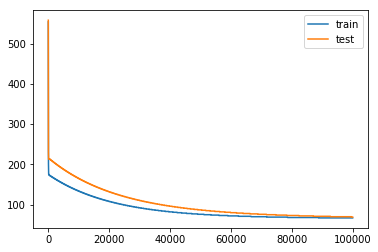

In [1]:
import numpy as np
import sklearn as sk
import pylab
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file
import matplotlib.pyplot as plt


def compute_error(b,m,x,y):
    totalError = 0
    #x=data[:,0]
    #y=data[:,1]
    N = len(y)
    #m.shape=(13,1)
    x.shape=(N,13)
    #temp=np.ones((N,1))*b
    totalError=(y-x.todense().dot(m)-b)
    totalError=totalError.T.dot(totalError)
    #totalError=np.sum(totalError,axis=0)
    totalError=np.sum(totalError)

    return totalError/float(len(y))


def optimizer(x,y,x_test,y_test,starting_b,starting_m,learning_rate,num_iter):
    b=starting_b
    m=starting_m
    error_list1 = np.arange(num_iter)
    error_list2 = np.arange(num_iter)
    br, mr = compute_gradient(starting_b, starting_m, x_test, y_test, learning_rate)

    for i in range(num_iter):
        if(i==0):
            b,m=compute_gradient(b,m,x,y,learning_rate)
            b+=br
            m+=mr
        else:
            b, m = compute_gradient(b, m, x, y, learning_rate)
        #if(i%10==0):
            #temp = compute_error(b,m,x,y)
            #print ('iter {0}:error={1}'.format(i,temp))
            #error_list[int(i/100)]=temp
        temp = compute_error(b, m, x, y)
        error_list1[i] = temp
        temp2 = compute_error(b,m,x_test,y_test)
        error_list2[i] = temp2
    return[b,m,error_list1,error_list2]


def compute_gradient(b_current,m_current,x,y,learning_rate):

    b_gradient = 0
    m_gradient = 0

    n=len(y)
    N = float(n)
    #x = data[:,0]
    #y = data[:,1]
    #temp = np.ones((n, 1))*b_current
    y.shape=(n,1)
    m_current.shape=(13,1)
    b_gradient = -(2/N)*(y-x.todense().dot(m_current)-b_current)
    b_gradient = b_gradient.mean()
    m_gradient = -(2/N)*x.todense().T*(((y-x.todense().dot(m_current)-b_current)))
    m_gradient = m_gradient.mean(axis=0)

    new_b = b_current-(learning_rate*b_gradient)
    new_m = m_current-(learning_rate*m_gradient)
    return[new_b,new_m]


def plot_data(error,error2):
    #x = data[:,0]
    #y = data[:,1]
    #y_predict = x.todense().dot(m)+b
    #pylab.plot(x,y,'o')
    #pylab.plot(x,y_predict,'k-')
    #pylab.show()
    n = range(len(error))
    #x = np.arange(n)*100
    pylab.plot(n,error,label='train')
    pylab.plot(n,error2,label='test')
    plt.legend()
    pylab.show()


def Linear_regression():
    #data = np.loadtxt('data.csv',delimiter=',')
    data = load_svmlight_file('housing_scale.txt')
    x_train,x_test,y_train,y_test = train_test_split(data[0],data[1],test_size=0.33,random_state=55)
    y_t = len(y_train)
    y_e = len(y_test)
    y_train.reshape((y_t,1))
    y_test.reshape((y_e,1))
    learning_rate = 0.01
    init_b = 0.0
    init_m = np.zeros(13)
    num_iter = 100000
    error = 0
    error2 = 0

    #print ('initial variables:\n initial_b = {0}\n intial_m = {1}\n error of begin = {2} \n'\
        #.format(init_b,init_m,compute_error(init_b,init_m,x_train,y_train)))

    #optimizing b and m
    [b ,m,error,error2] = optimizer(x_train,y_train,x_test,y_test,init_b,init_m,learning_rate,num_iter)

    #print final b m error
    print ('final formula parmaters:\n b = {1}\n m={2}\n error of end = {3} \n'.format(num_iter,b,m,compute_error(b,m,x_train,y_train)))

    #plot result
    #plot_data(x_train,y_train,b,m)
    plot_data(error,error2)


if __name__ =='__main__':
    Linear_regression()

